# Eléments de théorie de l'information

## 0. Rappels de probabilités

Ecrire une fonction `two_dices()` qui tire au sort deux nombres entre 1 et 6, uniformément.

In [3]:
import random

def two_dices():
    return (random.randint(1,6), random.randint(1,6))

for i in range(10):
    print(two_dices())


(2, 6)
(2, 3)
(1, 6)
(4, 2)
(2, 4)
(6, 4)
(1, 6)
(3, 6)
(2, 4)
(1, 1)


Ecrire une fonction `max_two_dices(nbr)` qui effectue `nbr` appels à `two_dices()` et qui renvoie un tableau `T` où `T[i]` est le nombre de fois que le maximum des valeurs des deux dés vaut `i`.

In [62]:
def max_two_dices(nbr):
    tab = [0] * 7
    for tentative in range(nbr):
        res = max(two_dices())
        tab[res]+= 1
    return tab

print(max_two_dices(10))


[0, 0, 0, 2, 1, 3, 4]


Voilà un exemple pour tracer un histogramme en utilisant `matplotlib.pyplot`.

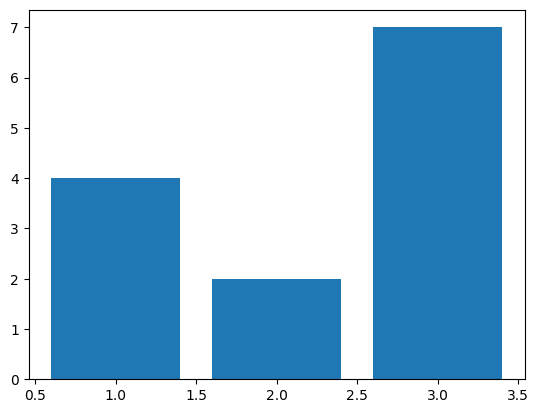

In [63]:
import matplotlib.pyplot as plt
plt.bar([1,2,3], [4,2,7])
plt.show()


Tracez l'histogramme de `max_two_dices(10000)`. Calculez également la moyenne empirique du résultat.

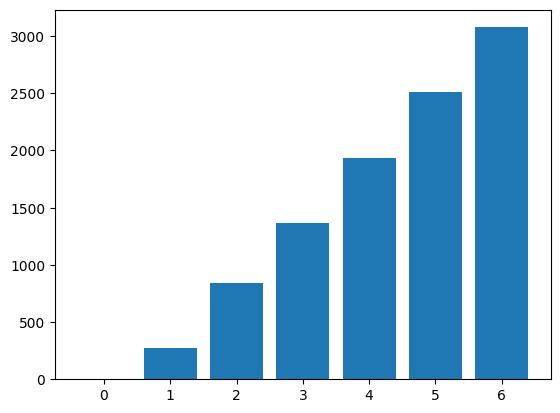

La moyenne est 4.4811


In [66]:
res = max_two_dices(10000)
plt.bar([0,1,2,3,4,5,6],res)
plt.show()

def moyenne(res):
    taille = sum(res)
    moyenne = 1
    for val in range(1,len(res)):
        moyenne += val * res[val]
    return moyenne/taille

print("La moyenne est",moyenne(res))


Reprenez les questions précédentes pour tracer l'histogramme de la somme de $k$ dés, pour $k=2$, $k=5$ et $k=10$.

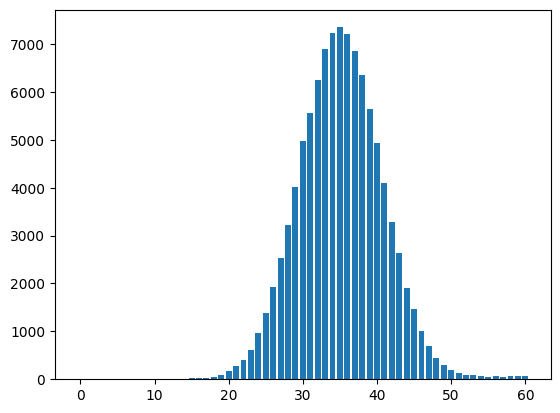

In [71]:
def k_dices(k):
    dice = [random.randint(1,6) for i in range(k)]
    return dice

def somme_k_dices(nbr,k):
    res = [i for i in range(k*6 + 1)]
    for cpt in range(nbr):
        tmp = sum(k_dices(k))
        res[tmp]+= 1
    return res

k = 10

plt.bar([i for i in range(k*6 + 1)],somme_k_dices(100000,k))
plt.show()
        


## 1. Entopie et Huffman par blocs

### Textes aléatoires
Ecrire une fonction `entropie(p)` qui calcule l'entropie d'une source binaire qui produit des 0 avec probabilité `p` et 1 avec probabilité `1-p`. Vous pouvez utiliser la fonction `log` de la bibliothèque `math`de Python. On calcule $\log_2 x$ avec `log(x,2)`.

In [97]:
from math import log

def entropie(p):
    if(p == 0 or p == 1): return 0
    return -p * log(p, 2) - (1 - p)*log(1-p,2)


Pour tracer une courbe en utilisant la bibliothèque `matplotlib`  qui passe par les points (1,3), (3,6) et (4,2), il faut créer une liste avec les abscisses `lx=[1,3,4]` et la liste des ordonnées `ly=[3,6,2]`, puis utiliser la fonction `plot(lx,ly)`, et enfin `show()`:

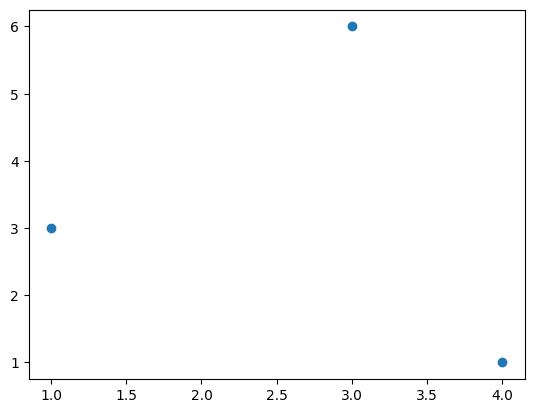

In [99]:
import matplotlib.pyplot as plt

lx = [1,3,4]
ly = [3,6,1]

plt.plot(lx,ly,'o',linestyle='')
plt.show()

Tracez la courbe de l'entropie, en utilisant 1000 abscisses entre 0 et 1.

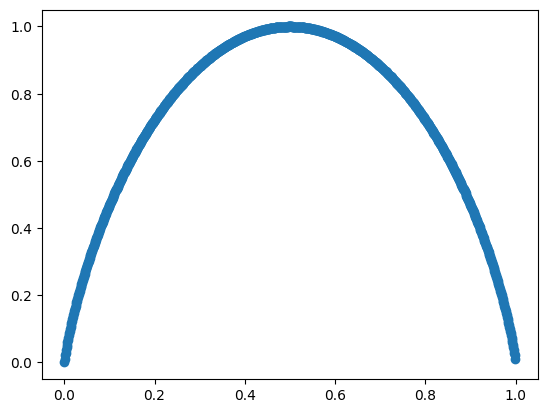

In [102]:
import numpy as np

abs = [i/1000 for i in range(1000)]
ord = [entropie(i/1000) for i in range(1000)]

plt.plot(abs,ord,'o',linestyle='')
plt.show()

Ecrire une fonction `randText(n,p)` qui génère aléatoirement une liste de `n` bits où les 1 on probabilité `p` et les 0 ont probabilité `1-p`.

In [109]:
def randText(n, p):
    population = [0,1]
    weight = [1-p, p]
    res = []
    for _ in range(n):
        res.append(random.choices(population,weight)[0])
    return ''.join(map(str,res))

print(randText(100,0.4))

0011000001010001010110000011110001000010101100000111010001001011001011010000000000100010000001100100


Ecrire une fonction `block(L,k)` qui prend en entrée une liste `L` de longueur $n$ multiple de $k$, $n=km$, et qui retourne une liste de longueur $m$ de $k$-tuples, où les éléments de `L` sont pris $k$ par $k$:

Si l'entrée est `L=[1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1]`, alors `block(L,2)` retourne

`[(1, 1), (0, 0), (0, 1), (0, 1), (0, 1), (1, 0), (1, 0), (0, 0), (0, 1), (1, 1)]`


In [133]:
def block(L,k):
    res = []
    tmp = []
    count = 0
    for elem in L:
        tmp.append(elem)
        count+=1
        if count%k == 0:
            print(tmp)
            res.append(tuple(tmp))
            tmp = []
        
    return res

L = [1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1]
print(len(L))

print(block(L,2))


20
[1, 1]
[0, 0]
[0, 1]
[0, 1]
[0, 1]
[1, 0]
[1, 0]
[0, 0]
[0, 1]
[1, 1]
[(1, 1), (0, 0), (0, 1), (0, 1), (0, 1), (1, 0), (1, 0), (0, 0), (0, 1), (1, 1)]


### Huffman

Importez votre bibliothèque pour compresser avec l'algorithme de Huffman, ou utilisez le code ci-dessous.

In [134]:
from collections import Counter

def count(u):
    return [(v,k) for k,v in Counter(u).items()]


class Heap:
    def __init__(self, key=lambda x:x):
        self.key = key
        self.array = []
        
    def __len__(self):
        return len(self.array)
        
    def father(self, i):
        return (i-1)//2 if i > 0 else None
    
    def left(self, i):
        return 2*i+1 if 2*i+1 < len(self) else None
        
    def right(self, i):
        return 2*i+2 if 2*i+2 < len(self) else None
        
    def value_at(self, i):
        return self.key(self.array[i]) if i<len(self) else None
        
    def mini(self):
        return self.array[0] if len(self)>0 else None
        
    def __check__(self, i=0):
        if i is None: return True # child not existing
        if self.left(i) is not None and self.value_at(i) > self.value_at(self.left(i)):
            return False
        if self.right(i) is not None and self.value_at(i) > self.value_at(self.right(i)):
            return False
        return self.__check__(self.left(i)) and self.__check__(self.right(i))

    def swap(self,i,j):
        self.array[i], self.array[j] = self.array[j], self.array[i]
    
    def add(self, x):
        self.array.append(x)
        i = len(self) - 1
        while self.father(i) is not None and self.value_at(self.father(i))>self.value_at(i):
            self.swap(self.father(i), i)
            i = self.father(i)
            
    def extract(self): 
        if len(self) == 0: return None
        if len(self) == 1: return self.array.pop()

        value = self.array[0]
        x = self.array.pop()
        self.array[0] = x
        
        i = 0
        while True:
            l, r = self.left(i), self.right(i)
            if l is None and r is None: 
                break
            if r is None:
                if self.value_at(i) > self.value_at(l):
                    self.swap(i,l)
                break # if no right child of i the process ends here necessarily
            c = l if self.value_at(l) < self.value_at(r) else r
            if self.value_at(i) > self.value_at(c):
                self.swap(i,c)
                i = c
            else:
                break # we're done               
        return value
    
def huffmanTree(L):
    C = count(L)
    H = Heap(lambda x:x[0])
    for v,c in C:
        H.add((v, c, None, None))
    while len(H)>1:
        x1 = H.extract()
        x2 = H.extract()
        A = (x1[0]+x2[0],None, x1,x2)
        H.add(A)
    return H.extract()

def huffmanToCode(T,C=None,word=None):
    if word is None:
        word = []
    if C is None:
        C = {}
    if T[1] is not None: # leaf
        C[T[1]] = u"".join(word)
    else:
        word.append('0')
        huffmanToCode(T[2],C,word)
        word[-1] = '1'
        huffmanToCode(T[3],C,word)
        word.pop()
    return C

Créez une fonction `huffmanSize(text)` qui calcule la taille, en nombre de bits, du résultat si on compresse le texte `text`. Votre fonction doit retourner deux valeurs : 
- **La taille de l'encodage de l'arbre :** Comme vu en cours, si les symboles sont codés sur $b$ bits, et qu'il y en a $k$ différents dans le texte, alors l'arbre de Huffman peut être encodé en utilisant $(b+2)k-1$ bits. On remarque que $b=\lceil \log_2(k+1)\rceil$ si on prend un codage de longueur fixe de plus petite longueur pour les $k$ symboles.
- **La taille du message une fois compressé :** Si on notre $\phi$ l'application qui à un symbole $\alpha$ associe son encodage binaire, et $n_\alpha$ le nombre d'occurrences du symbole $\alpha$ dans le texte `text`, cette taille est égale à $\sum_\alpha |\phi(\alpha)| n_\alpha$.

Pour la fonction `huffmanSize(text)` on ne tient pas compte des quelques ajustements à faire pour écrire le résultat en octets à la fin (bits inutiles, ...)

In [140]:
text = "salut a tous les amis"
print(huffmanTree(text))
print(huffmanToCode(huffmanTree(text)))

def get_right_power(nbSymbol):
    n = 0
    while(nbSymbol > 2**n):
        n+=1
    return n


def huffmanSize(text):
    tree = huffmanTree(text)
    encodage = huffmanToCode(tree)
    codage = get_right_power(len(encodage))
    tree_size = (codage + 2) * len(encodage) - 1
    print(tree_size)

huffmanSize(text)


(21, None, (8, None, (4, 's', None, None), (4, None, (2, None, (1, 'o', None, None), (1, 'e', None, None)), (2, 't', None, None))), (13, None, (5, None, (2, 'u', None, None), (3, 'a', None, None)), (8, None, (4, None, (2, 'l', None, None), (2, None, (1, 'i', None, None), (1, 'm', None, None))), (4, ' ', None, None))))
{'s': '00', 'o': '0100', 'e': '0101', 't': '011', 'u': '100', 'a': '101', 'l': '1100', 'i': '11010', 'm': '11011', ' ': '111'}
59


### Applications

On prend $p=\frac14$. Que vaut $H(p)$? 

Générez un long texte aléatoire avec `randText(n,p)`. Quel est le taux de compression si on applique Huffman  sur des blocs de taille $k\in\{1,2,3,4,10\}$ (attention à ce que $n$ soit un multiple de $k$).

En faisant varier $p$ entre $0$ et $1$, tracez la courbe des taux de compression pour des textes de longueur 10000. Superposez la courbe de l'entropie. Essayez différentes valeurs de $k$, quelle est celle qui donne de meilleurs résultats ?

## 2. Simulation par chaîne de Markov

Chargez le fichier `sample_human_dna.fna` qui contient une petite partie du premier chromosome humain. En utilisant `count` calculez le pourcentage de chacun des nucléotides.

Ecrire une fonction qui prend en argument un texte `texte` une chaîne de Markov d'ordre 1 en se basant sur `texte`.

Appliquez votre fonction au fichier `sample_human_dna.fna` et affichez toutes les probabilités. Qu'observez-vous ?

Ecrire une fonction qui prend en argument un texte `texte` un entier `k` et qui calcule une chaîne de Markov d'ordre `k` en se basant sur `texte`.

Ecrire une fonction qui prend en argument une chaîne de Markov `C`, un état de départ `depart` et un entier `n`, et qui retourne un texte aléatoire de longueur `n` obtenu en faisant un parcours probabiliste dans la chaîne de Markov `C`.

En prenant comme texte l'`etranger` de Camus et différentes tailles de mémoire `k`, générez aléatoirement des textes qui ressemblent à du français. 